Demonstrate functions in Scan for setting and reading tones

In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
import pandas as pd
import Scan
soc = TopSoc()

In [2]:
scan = Scan.Scan(soc)
fMixer = soc.fsIn/2/2
scan.soc.set_mixer(fMixer)

1024.0

In [3]:
# Setup tones that are in nearby channels, to fully test multi-tone readout
f0 = fMixer + 1.4
nTones = 10
freqs = f0 + 0.1 + np.arange(nTones)*(1.2*soc.fcOut+0.01)
# Move one tone away from the others
freqs[0] += 34.56
freqs[3] -= 123.456

inCh, dds_freq, pfb_freq, ch = soc.pfb_in.freq2ch(freqs)   
outCh, outOffset = soc.outFreq2chOffset(freqs)
inCh, inOffset = soc.inFreq2chOffset(freqs)
data = np.transpose(np.array([freqs, outCh, outOffset, inCh, inOffset]))
pd.DataFrame(data, columns=["freq","outCh","outOffset", "inCh", "inOffset"])

,freq,outCh,outOffset,inCh,inOffset
0,1060.060,18.0,0.060,72.0,0.060
1,1027.910,2.0,-0.090,8.0,-0.090
2,1030.320,3.0,0.320,13.0,-0.180
3,909.274,455.0,-0.726,3867.0,-0.226
4,1035.140,6.0,-0.860,22.0,0.140
5,1037.550,7.0,-0.450,27.0,0.050
6,1039.960,8.0,-0.040,32.0,-0.040
7,1042.370,9.0,0.370,37.0,-0.130
8,1044.780,10.0,0.780,42.0,-0.220
9,1047.190,12.0,-0.810,46.0,0.190


In [4]:
amps = 0.9*np.ones(len(freqs))/len(freqs)
fis = 1+(0.1*np.arange(len(freqs)))
scan.setTones(freqs, amps, fis)
decimation = 2
scan.prepRead(decimation)

nt = 1
nsamp = 2000
truncate = 1000
x = scan.readAndUnpack(nt=nt, nsamp=nsamp,unpackVerbose=True)

self.packets.shape = (1, 2000, 17)
     packets.shape = (1, 2000, 17)
      ntrans.shape = (1, 2000)
         xis.shape = (1, 2000, 8)
         xqs.shape = (1, 2000, 8)
          xs.shape = (1, 2000, 8)
 ntranPattern = [  1   2   3   4   5   9 483]
   nt, iTone , x.shape 0 0 (258,)
   nt, iTone , x.shape 0 1 (258,)
   nt, iTone , x.shape 0 2 (258,)
   nt, iTone , x.shape 0 3 (212,)
   nt, iTone , x.shape 0 4 (258,)
   nt, iTone , x.shape 0 5 (258,)
   nt, iTone , x.shape 0 6 (258,)
   nt, iTone , x.shape 0 7 (258,)
   nt, iTone , x.shape 0 8 (258,)
   nt, iTone , x.shape 0 9 (258,)


Text(0, 0.5, 'Amplitude (ADUs)')

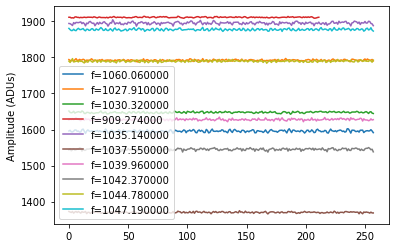

In [5]:
it = 0
for iTone in range(len(x[it])):
    plt.plot(np.abs(x[it][iTone]), label="f=%f"%(freqs[iTone]))
plt.legend()
plt.ylabel("Amplitude (ADUs)")

Text(0, 0.5, 'Phase (Radians)')

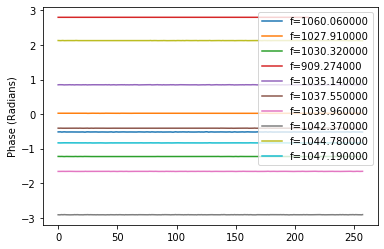

In [6]:
it = 0
for iTone in range(len(x[it])):
    plt.plot(np.angle(x[it][iTone]), label="f=%f"%(freqs[iTone]))
plt.legend()
plt.ylabel("Phase (Radians)")

In [7]:
importlib.reload(Scan)
scan = Scan.Scan(soc)
fMixer = soc.fsIn/2/2
scan.soc.set_mixer(fMixer)
subtractInputPhase=False

# Setup tones that are in nearby channels, to fully test multi-tone readout
f0 = fMixer + 1.4
nTones = 10
freqs = f0 + 0.1 + np.arange(nTones)*(1.2*soc.fcOut+0.01)
# Move one tone away from the others
freqs[0] += 34.56
freqs[3] -= 123.456
amps = 0.9*np.ones(len(freqs))/len(freqs)
fis = 1+(0.1*np.arange(len(freqs)))
scan.setTones(freqs, amps, fis)
decimation = 2
scan.prepRead(decimation)
nt = 2
nsamp = 20000
truncate = 1000
x = scan.readAndUnpack(nt=nt, nsamp=nsamp, subtractInputPhase=subtractInputPhase)

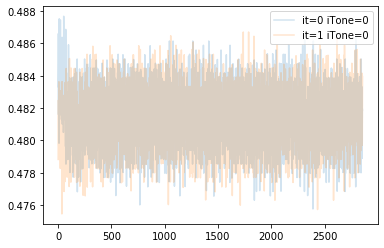

In [8]:
iTone = 0
for it in range(nt):
    plt.plot(np.angle(x[it][iTone]), label="it=%d iTone=%d"%(it,iTone), alpha=0.2)
plt.legend()

In [9]:
#test average=True in unpack
verbose = True
average=True
iBegin=0
xa = scan.unpack(verbose, average, subtractInputPhase, iBegin)

self.packets.shape = (2, 20000, 17)
     packets.shape = (2, 20000, 17)
      ntrans.shape = (2, 20000)
         xis.shape = (2, 20000, 8)
         xqs.shape = (2, 20000, 8)
          xs.shape = (2, 20000, 8)
 ntranPattern = [  1   2   3   4   5   9 483]
   nt, iTone , x.shape 0 0 (2856,)
   nt, iTone , x.shape 0 1 (2858,)
   nt, iTone , x.shape 0 2 (2858,)
   nt, iTone , x.shape 0 3 (2858,)
   nt, iTone , x.shape 0 4 (2858,)
   nt, iTone , x.shape 0 5 (2857,)
   nt, iTone , x.shape 0 6 (2857,)
   nt, iTone , x.shape 0 7 (2857,)
   nt, iTone , x.shape 0 8 (2856,)
   nt, iTone , x.shape 0 9 (2856,)
   nt, iTone , x.shape 1 0 (2857,)
   nt, iTone , x.shape 1 1 (2857,)
   nt, iTone , x.shape 1 2 (2857,)
   nt, iTone , x.shape 1 3 (2858,)
   nt, iTone , x.shape 1 4 (2857,)
   nt, iTone , x.shape 1 5 (2857,)
   nt, iTone , x.shape 1 6 (2857,)
   nt, iTone , x.shape 1 7 (2857,)
   nt, iTone , x.shape 1 8 (2857,)
   nt, iTone , x.shape 1 9 (2857,)


In [10]:
xa.shape

(10,)

Text(0.5, 1.0, 'red line is mean of both reads')

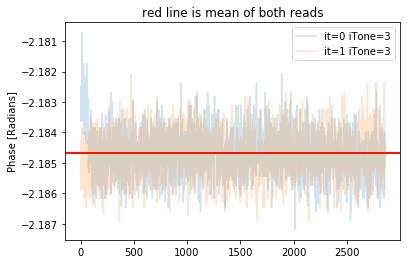

In [11]:
iTone = 3
for it in range(nt):
    plt.plot(np.angle(x[it][iTone]), label="it=%d iTone=%d"%(it,iTone), alpha=0.2)
    plt.axhline(np.angle(xa[iTone]), c='r')
plt.legend()
plt.ylabel("Phase [Radians]")
plt.title("red line is mean of both reads")